# Bootcamp DSP-IP - Home test
## Iris Flower - Recognition Problem

### 1. Dataset Information
 The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.<br>
 
 **Predicted attribute:**   
 - class of iris plant:
     - Iris Setosa
     - Iris Versicolour
     - Iris Virginica

 
**Numeric attributes:**
 1. sl = sepal length in cm
 2. sw = sepal width in cm
 3. pl = petal length in cm
 4. pw = petal width in cm

In [1]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv('./iris.csv')
data.shape

(150, 5)

In [3]:
data.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Data Exploration

In [4]:
data.isnull().sum()

sl       0
sw       0
pl       0
pw       0
class    0
dtype: int64

First, we can notice that there are no missing values in the dataset.  
Secondly, we will look at the summary statistics of the attributes (mean, std and IQR values):

In [5]:
data.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


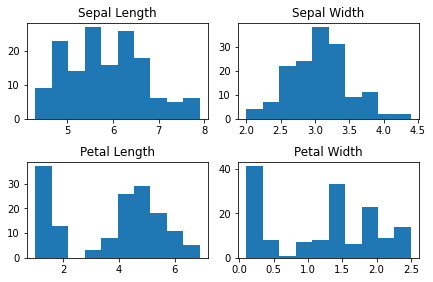

In [6]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['sl'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(data['sw'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(data['pl'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(data['pw'], bins = n_bins);
axs[1,1].set_title('Petal Width');

fig.tight_layout(pad=1.0);   # add some spacing between subplots

It can be noticed that the attributes 'Sepal Length' and 'Sepal Width' seem to have normal distributions. However, it is not the case with 'Petal Length' and 'Petal Width'.  
Next, we will use arrays of scatter plots in order to investigate the correlations between the attributes:

In [7]:
import seaborn as sns

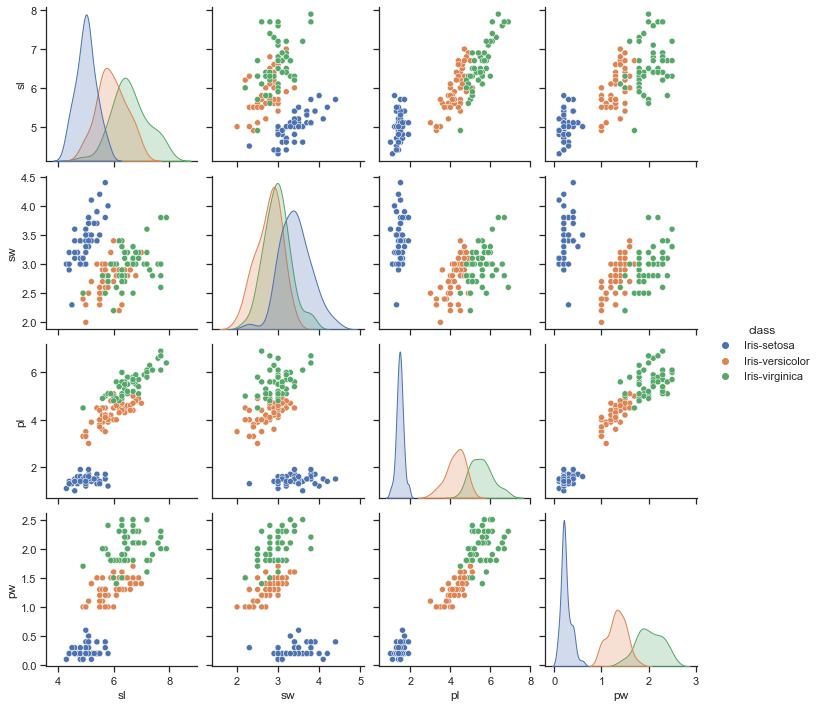

In [8]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="class")

Note that some variables seem to be highly correlated, e.g., 'Petal Length' and 'Petal Width'. In addition, the Petal measurements separate the different species better than the sepal ones. Next, we will make a correlation matrix to quantitatively examine the relationship between variables:

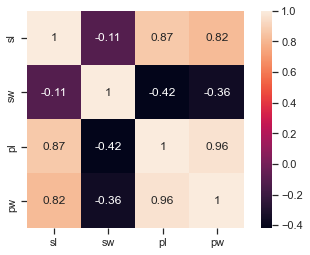

In [9]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

The matrix values compatible with our conclusions. The maximum correlation is between 'Petal Length' and 'Petal Width', 0.96. In addition we can notices that 'Septal Length' is high correlated with both 'Petal Length' and 'Petal Width', 0.87 and 0.82 corresponding.

### 3. Classifiers Algorithms

In [10]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']

In [11]:
from sklearn.model_selection import train_test_split

# split to train and test
train, test = train_test_split(data, test_size = 0.3, stratify = data["class"], random_state = 13)

X_train = train[['sl','sw','pl','pw']]
y_train = train["class"]
X_test = test[['sl','sw','pl','pw']]
y_test = test["class"]

#### 1. PCA + K-means
Principal Component Analysis (PCA) is an unsupervised linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space, While preserving the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.  
For this task, I will use PCA in order to project the original data which is 4D into 2D and even 1D.

In [12]:
from sklearn.preprocessing import StandardScaler

features = ['sl', 'sw', 'pl', 'pw']
x = data.loc[:, features].values   # Separating out the features
y = data.loc[:,['class']].values   # Separating out the target

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

The above array represents the variation (information) of the data that can be explained by the new 4 principal components. It can be notice that the first component contains 92.5% of the variance, while the other components share the 7.5% left.

Let's show the original data in the new coordinates:

In [14]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,class
0,-2.684207,0.326607,-0.021512,0.001006,Iris-setosa
1,-2.715391,-0.169557,-0.203521,0.099602,Iris-setosa
2,-2.889820,-0.137346,0.024709,0.019305,Iris-setosa
3,-2.746437,-0.311124,0.037672,-0.075955,Iris-setosa
4,-2.728593,0.333925,0.096230,-0.063129,Iris-setosa


- **Visualize 2D Projection**

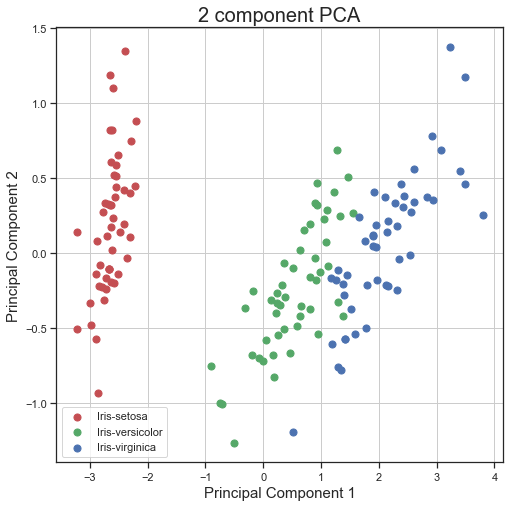

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

- **Visualize 1D Projection**

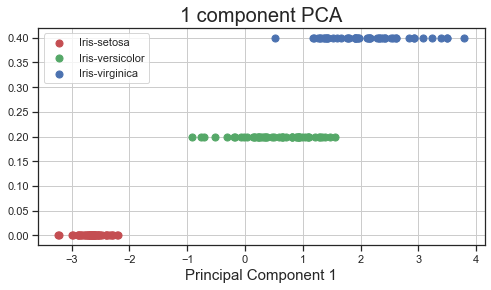

In [16]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('1 component PCA', fontsize = 20)
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for i, (label, color) in enumerate(zip(classes, colors)):
    indicesToKeep = finalDf['class'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], np.ones((50,1))*i*0.2
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()

Base on the resulting graphs I will choose to work with the 2D projection. The next step is to use a classification algorithm. I will use **K-Mean**. The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple geometric conception of what the optimal clustering looks like.


In [17]:
from sklearn.model_selection import train_test_split

# split to train and test - 60%-40%
train, test = train_test_split(finalDf, test_size = 0.4, stratify = data["class"], random_state = 13)

X_train = train[['PC1', 'PC2']]
y_train = train["class"]
X_test = test[['PC1', 'PC2']]
y_test = test["class"]

In [18]:
# Build K-Mean modle
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
# centers = kmeans.cluster_centers_

KMeans(n_clusters=3)

Text(0.5, 1.0, 'train set prediction')

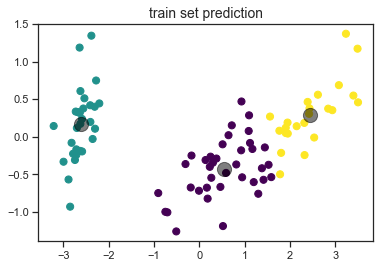

In [19]:
# Predict on train set
y_train_kmeans = kmeans.predict(X_train)
plt.scatter(X_train["PC1"], X_train["PC2"], c=y_train_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("train set prediction", fontsize=14)

Text(0.5, 1.0, 'test set')

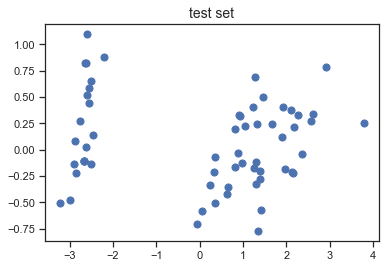

In [20]:
plt.scatter(X_test["PC1"], X_test["PC2"], s=50);
plt.title("test set", fontsize=14)

Text(0.5, 1.0, 'test set prediction')

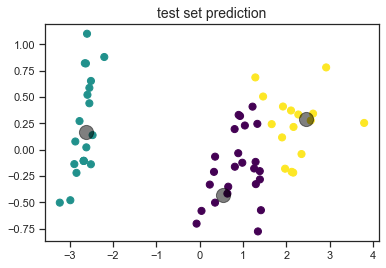

In [21]:
# Predict on test set
y_test_kmeans = kmeans.predict(X_test)
plt.scatter(X_test["PC1"], X_test["PC2"], c=y_test_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("test set prediction", fontsize=14)

In [22]:
classes = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

y_train_t = y_train.tolist()
y_test_t = y_test.tolist()

In [23]:
train_acc_tmp = [1 if y_train_kmeans[i]==classes.index(y_train_t[i]) else 0 for i in range(len(y_train_kmeans))]
train_acc = sum(train_acc_tmp)/len(train_acc_tmp)

test_acc_tmp = [1 if y_test_kmeans[i]==classes.index(y_test_t[i]) else 0 for i in range(len(y_test_kmeans))]
test_acc = sum(test_acc_tmp)/len(test_acc_tmp)

print("The accuracy of K-Mean is:\ntrain: {:.3f}\ntest: {:.3f}".format(train_acc, test_acc))

The accuracy of K-Mean is:
train: 0.900
test: 0.867


#### 2. Decision Tree  
Decision Trees are a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [25]:
# split to train and test
train, test = train_test_split(data, test_size = 0.4, stratify = data["class"], random_state = 13)

X_train = train[['sl','sw','pl','pw']]
y_train = train["class"]
X_test = test[['sl','sw','pl','pw']]
y_test = test["class"]

In [26]:
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
mod_dt.fit(X_train,y_train)
mod_dt.feature_importances_

array([0.        , 0.        , 0.43002545, 0.56997455])

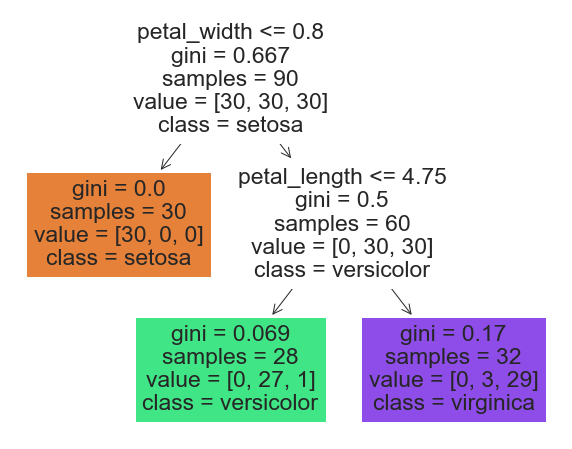

In [27]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

In [28]:
prediction=mod_dt.predict(X_test)
print("The accuracy of the Decision Tree is {:.3f}.".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.950.


To conclude, we used 2 different algorithms, PCA & K-Mean and Decision Tree. The decision tree modle gained higer classification accuracy by ~9%. 